In [1]:
from models.vanderpol import VanDerPol, VanDerPol_UnitBox
from models.sir import SIR_UnitBox, SIR
from models.harosc import HarOsc
from models.oscpart import OscPart
from models.rossler import Rossler_UnitBox
from models.quadcopter import Quadcopter_UnitBox

from kaa.settings import PlotSettings, KaaSettings
from kaa.timer import Timer

from kaa.reach import ReachSet
from kaa.plotutil import Plot
from kaa.trajectory import Traj

from kaa.temp.pca_strat import PCAStrat
from kaa.temp.lin_app_strat import LinStrat
from kaa.temp.pca_lin_strat import PCALinStrat

from itertools import product

KaaSettings.SuppressOutput = True


# Harmonic Oscillator rotating $\pi/4$ (7 Steps)



## Linear Approximation Strategy

* Directions calculated from the linear approximation strategy are maximized over **both** the previously computed initial box template and the previously computed linear app. templates.

* Simulated for 7 time steps.

Initial Box: $[[-5,-4],[0,1]]$

Plotting phase for dimensions x, y done -- Time Spent: 0.26071596145629883
Average Generator Procedure Duration: 0.0004098370105405397 sec
Average Functional Composition Duration: 0.0028806872227612663 sec
Average Bound Computation Duration: 0.003407997243544635 sec
Average Reachable Set Computation Duration: 0.21280929020472936 sec
Average Phase Duration: 0.26071596145629883 sec


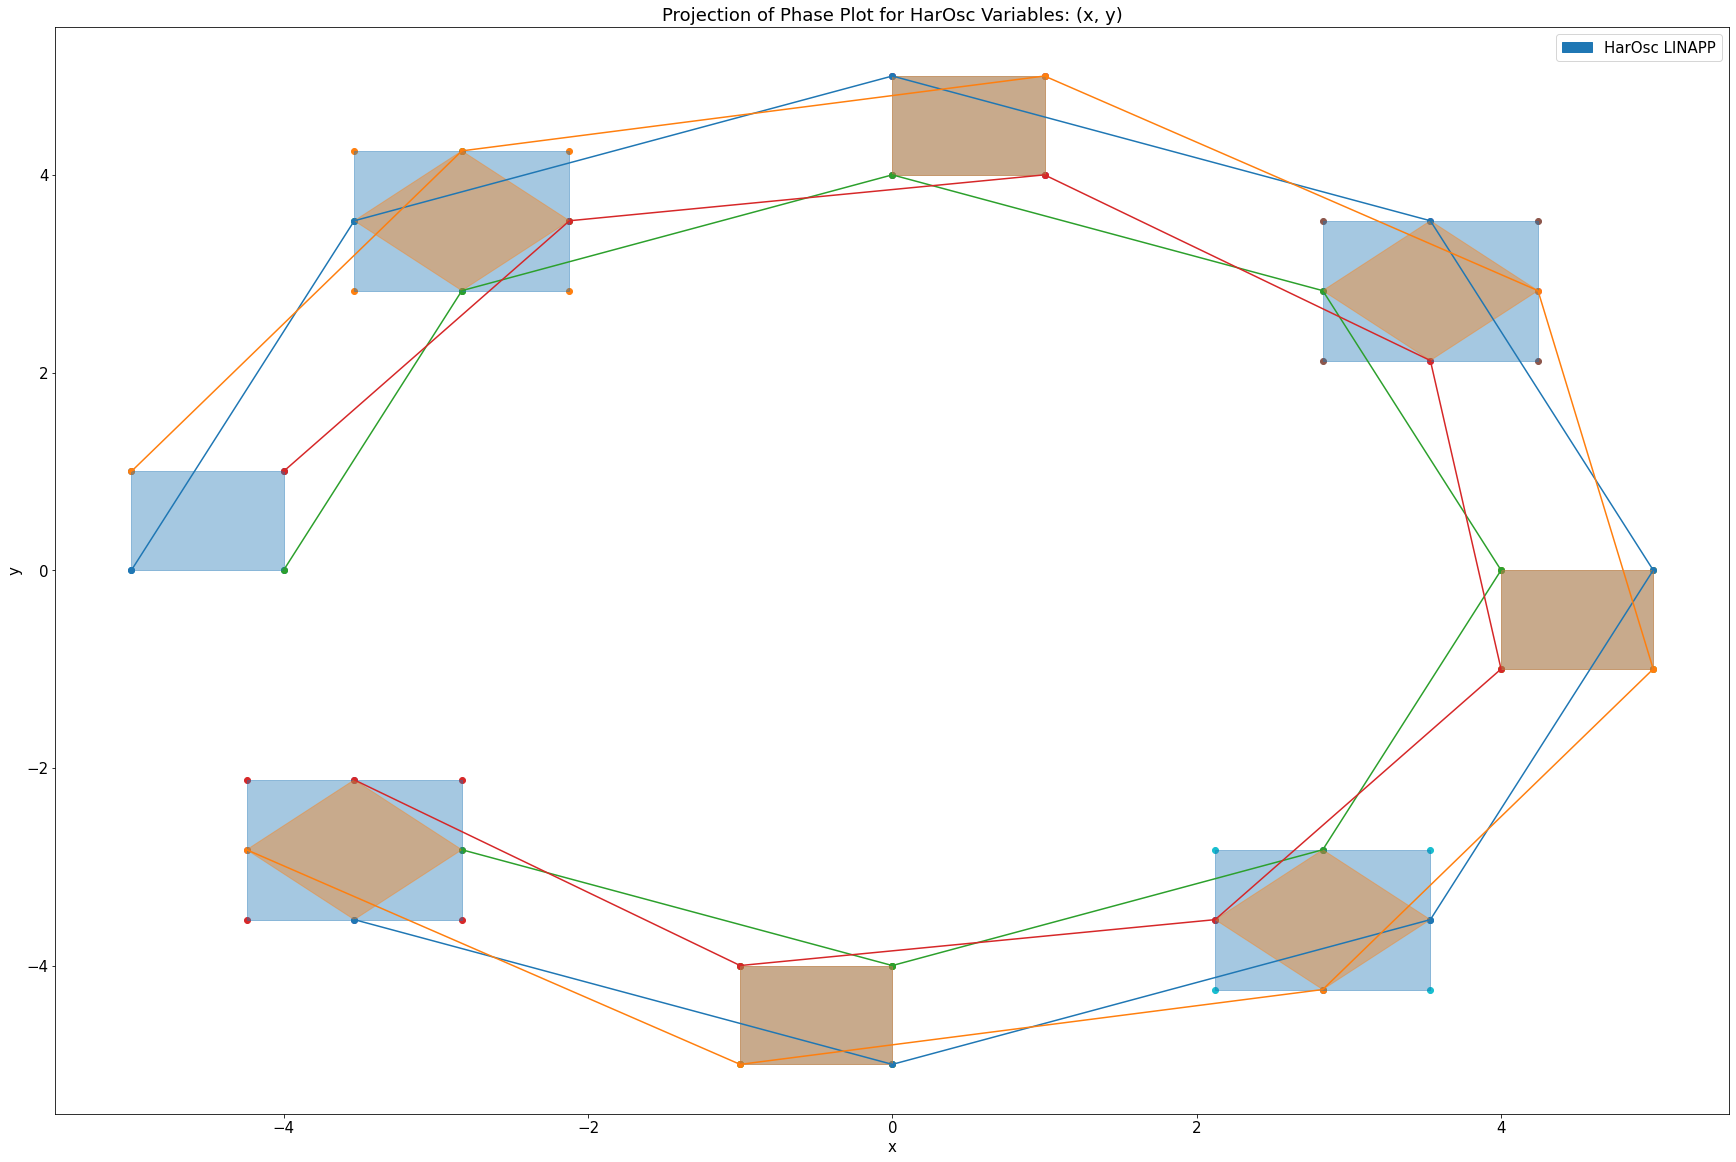

In [2]:
NUM_STEPS = 7

model = HarOsc()
#trajs = generate_traj(model, 10, 200)
mod_reach = ReachSet(model)
#mod_flow = mod_reach.computeReachSet()

sir_plot = Plot()
#mod_flow = mod_reach.computeReachSet(NUM_STEPS)

SIR_LIN_ITER_STEPS = 1 #Number of steps between each recomputation of PCA Templates.
lin_strat = LinStrat(model, iter_steps=SIR_LIN_ITER_STEPS)
mod_lin_flow = mod_reach.computeReachSet(NUM_STEPS, tempstrat=lin_strat)
trajs = [Traj(model, point, steps=NUM_STEPS) for point in product([-5,-4],[0,1])]

'Generaste the trajectories and add them to the plot.'
sir_plot.add(mod_lin_flow, "HarOsc LINAPP")
for t in trajs:
    sir_plot.add(t)

sir_plot.plot2DPhase(0,1, separate=True, plotvertices=True)
Timer.generate_stats()

## PCA Strategy

* PCA is run on every step and the PCA component directions are maximized over **both** the previous initial box template and previously computed PCA template.

* 100 trajectories are sampled for the PCA routine and each trajectory is propagated forward in time for exactly **one** step.

* Simulated for 5 time steps.

Initial Box: $[[-5,-4],[0,1]]$


Plotting phase for dimensions x, y done -- Time Spent: 0.21979618072509766
Average Generator Procedure Duration: 0.00033833589078190385 sec
Average Functional Composition Duration: 0.0031522159223203307 sec
Average Bound Computation Duration: 0.003144415440382781 sec
Average Reachable Set Computation Duration: 1.498255026967902 sec
Average Phase Duration: 0.26807673772176105 sec


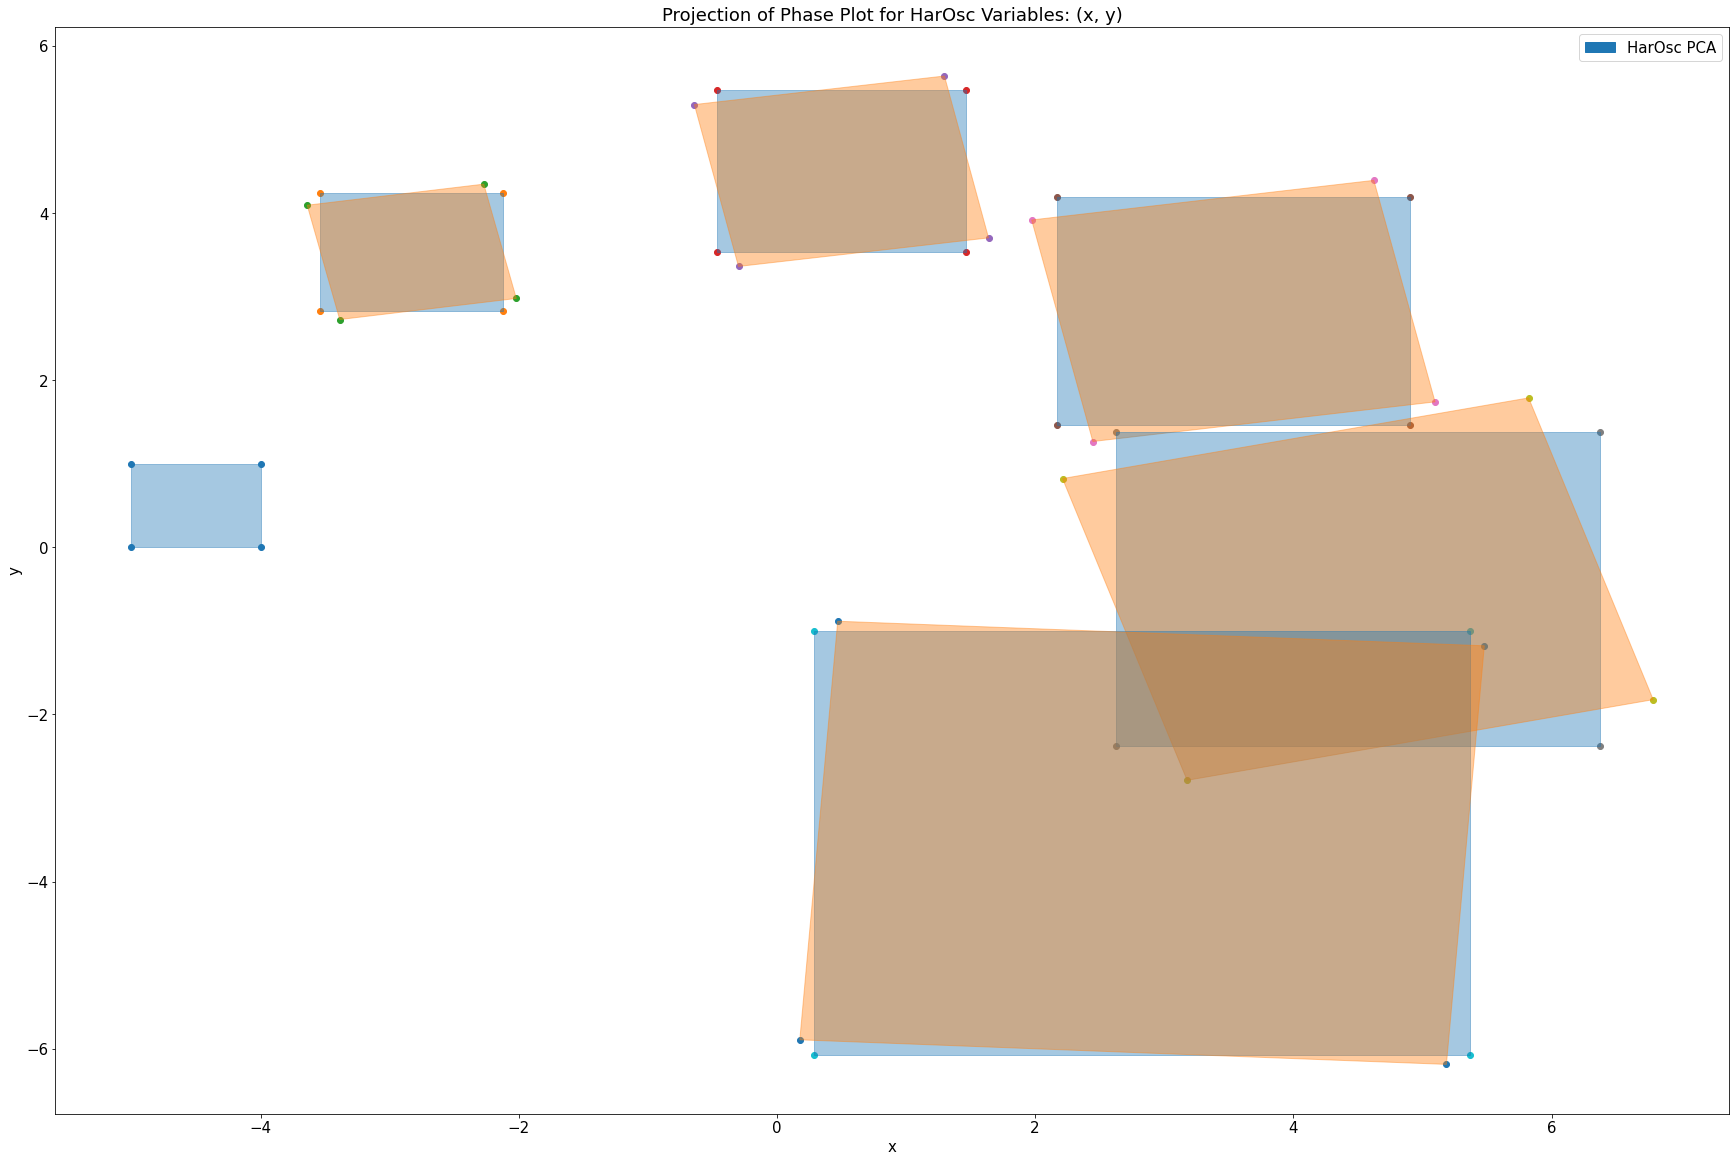

In [5]:
NUM_STEPS = 5

model = HarOsc()
mod_reach = ReachSet(model)

SIR_PCA_ITER_STEPS = 1 #Number of steps between each recomputation of PCA Templates.
'PCA Strategy Parameters'
SIR_PCA_TRAJ_STEPS = 1 #Number of steps our sample trajectories should run.
SIR_PCA_NUM_TRAJ = 200 #Number of sample trajectories we should use for the PCA routine.

pca_strat = PCAStrat(model, traj_steps=SIR_PCA_TRAJ_STEPS, num_trajs=SIR_PCA_NUM_TRAJ, iter_steps=SIR_PCA_ITER_STEPS)
mod_pca_flow = mod_reach.computeReachSet(NUM_STEPS, tempstrat=pca_strat)

vdp_plot = Plot()
#vdp_plot.add(mod_flow, "HarOsc")
vdp_plot.add(mod_pca_flow, "HarOsc PCA")
vdp_plot.plot2DPhase(0,1, separate=True, plotvertices=True)

Timer.generate_stats()

## PCA & LinApp Tandem Strategy

* Strategy where both PCA and lin. app. strategies are generating directions. Once the directions from both schemes are appended to directions matrix, they are maximized over all previously computed templates.

* Simulated for 7 steps.

* As expected, the Lin. App. strategy is already tight, so running PCA yields no advantages. 

* The **blue** template is our initial box, the **green** template is our Lin. App. template, and the **orange** template is our PCA template

Initial Box: $[[-5,-4],[0,1]]$

Plotting phase for dimensions x, y done -- Time Spent: 0.2409210205078125
Average Generator Procedure Duration: 0.0003349458534144251 sec
Average Functional Composition Duration: 0.003006998620002098 sec
Average Bound Computation Duration: 0.002992121612324434 sec
Average Reachable Set Computation Duration: 1.9674303314902566 sec
Average Phase Duration: 0.2590480804443359 sec


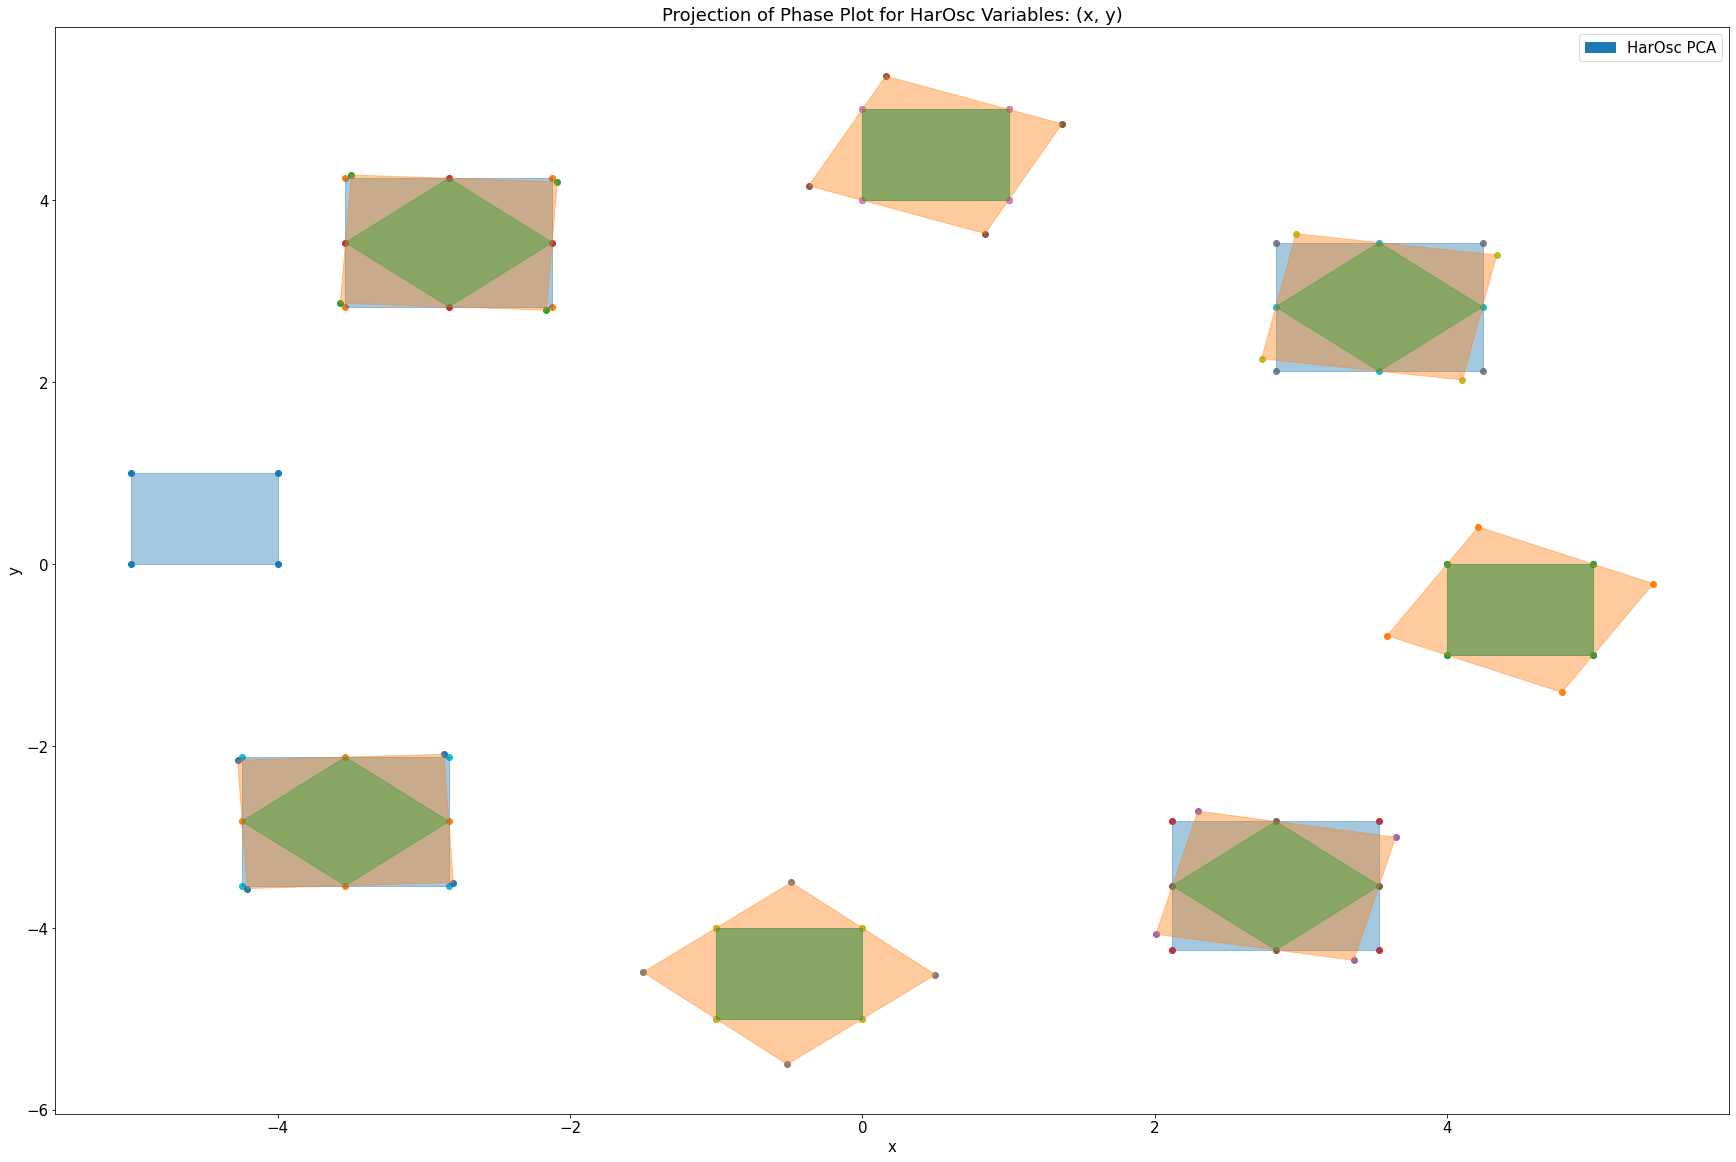

In [7]:
NUM_STEPS = 7

model = HarOsc()
mod_reach = ReachSet(model)

SIR_PCA_ITER_STEPS = 1 #Number of steps between each recomputation of PCA Templates.
'PCA Strategy Parameters'
SIR_PCA_TRAJ_STEPS = 1 #Number of steps our sample trajectories should run.
SIR_PCA_NUM_TRAJ = 250 #Number of sample trajectories we should use for the PCA routine.

pca_strat = PCALinStrat(model, traj_steps=SIR_PCA_TRAJ_STEPS, num_trajs=SIR_PCA_NUM_TRAJ, iter_steps=SIR_PCA_ITER_STEPS)
mod_pca_flow = mod_reach.computeReachSet(NUM_STEPS, tempstrat=pca_strat)

vdp_plot = Plot()
#vdp_plot.add(mod_flow, "HarOsc")
vdp_plot.add(mod_pca_flow, "HarOsc PCA")
vdp_plot.plot2DPhase(0,1, separate=True, plotvertices=True)

Timer.generate_stats()

# VanderPol System ($\Delta = 0.08$, 40 steps)

## Sapo's Output with its Templates

* $[[1.97,2],[0,0.01]]$

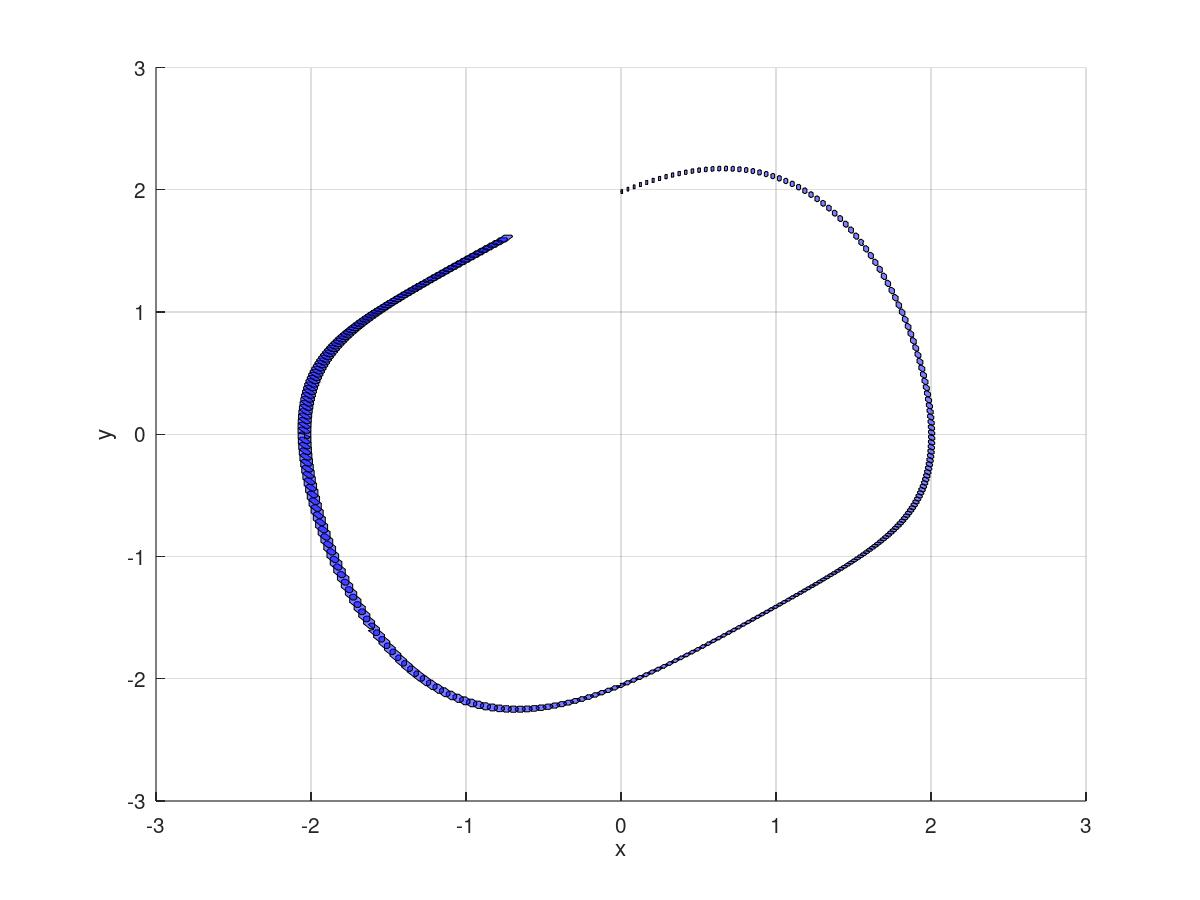

In [6]:
from IPython.display import Image
Image("figures/Sapo/SapoVDP.jpg")


## Kaa's Output with Same Template Set 

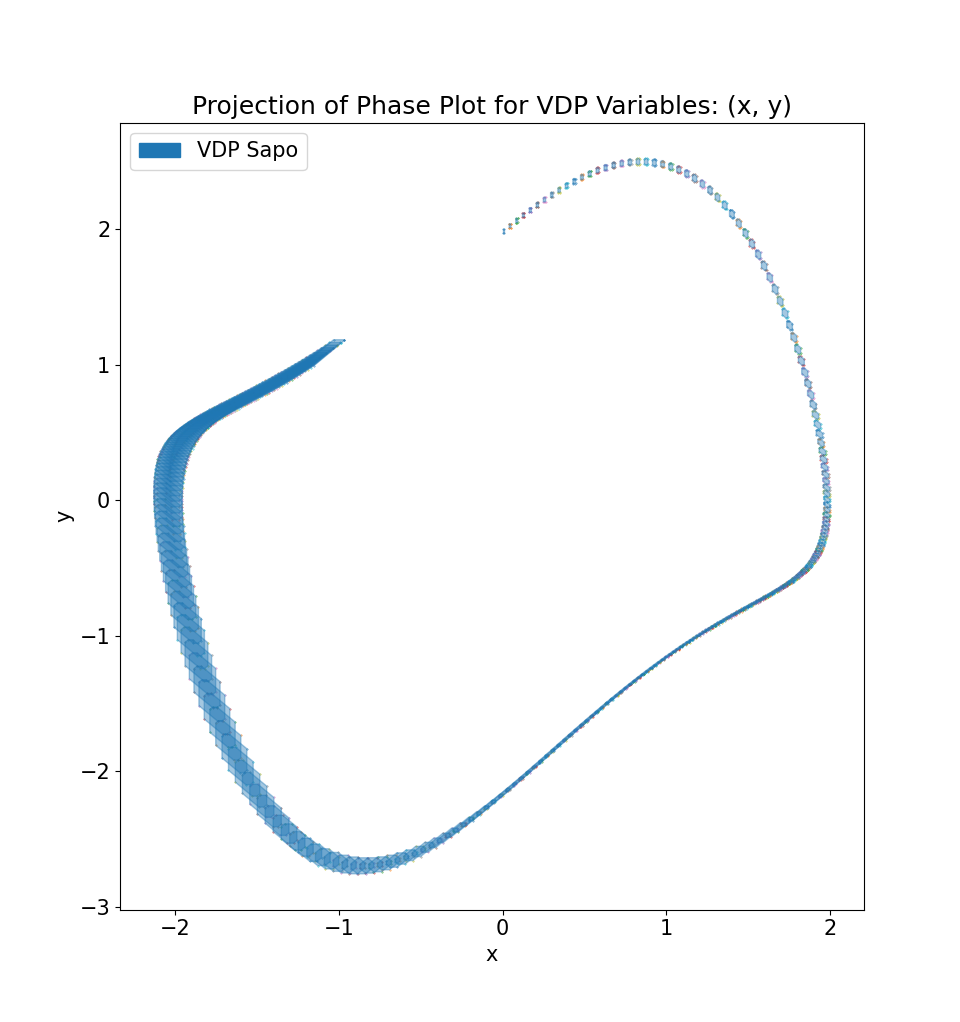

In [8]:
Image("figures/Sapo/KaaVDP.png")

## Linear Approximation Strategy

* Initial Box: $[[0,0.1],[1.9,2]]$
* The lin. app. directions are calculated every time step.
* The degeneracy that Stan mentioned when the points become closely compressed together seems to take effect after time step **20** or so. 

COND NUM: 1.0833260629814163
COND NUM: 1.186452453266962
COND NUM: 1.356206187948415
COND NUM: 1.6403819716571986
COND NUM: 2.2044404515724447
COND NUM: 2.623328295991204
COND NUM: 15.032609732326506
NORM_LIN_DIR: [[ 0.92321814 -0.38427629]
 [ 0.99855886  0.05366756]]
Closest Dirs: (0, 1)
LIN DIR: [[ 0.9608885  -0.16530436]
 [ 0.17658827  0.98428481]]
COND NUM: 1.640132323313457
COND NUM: 1.846455961214616
COND NUM: 2.372127511347972
COND NUM: 2.7865844712797823
COND NUM: 3.2400284880814794
COND NUM: 2.3332062738025843
COND NUM: 2.051233663906592
COND NUM: 1.3995801799643237
COND NUM: 1.1775619328283244
COND NUM: 1.3480683449710282
COND NUM: 1.6066179469714041
COND NUM: 2.4890753434006725
COND NUM: 6.682162133650273
COND NUM: 7.795357882396998
NORM_LIN_DIR: [[-0.24872304 -0.96857465]
 [ 0.51397523 -0.85780503]]
Closest Dirs: (0, 1)
LIN DIR: [[ 0.1326261  -0.91318984]
 [-0.98087195 -0.19465412]]
COND NUM: 1.4163964245796694
COND NUM: 2.3241675451656847
COND NUM: 2.4436842088801547
COND 

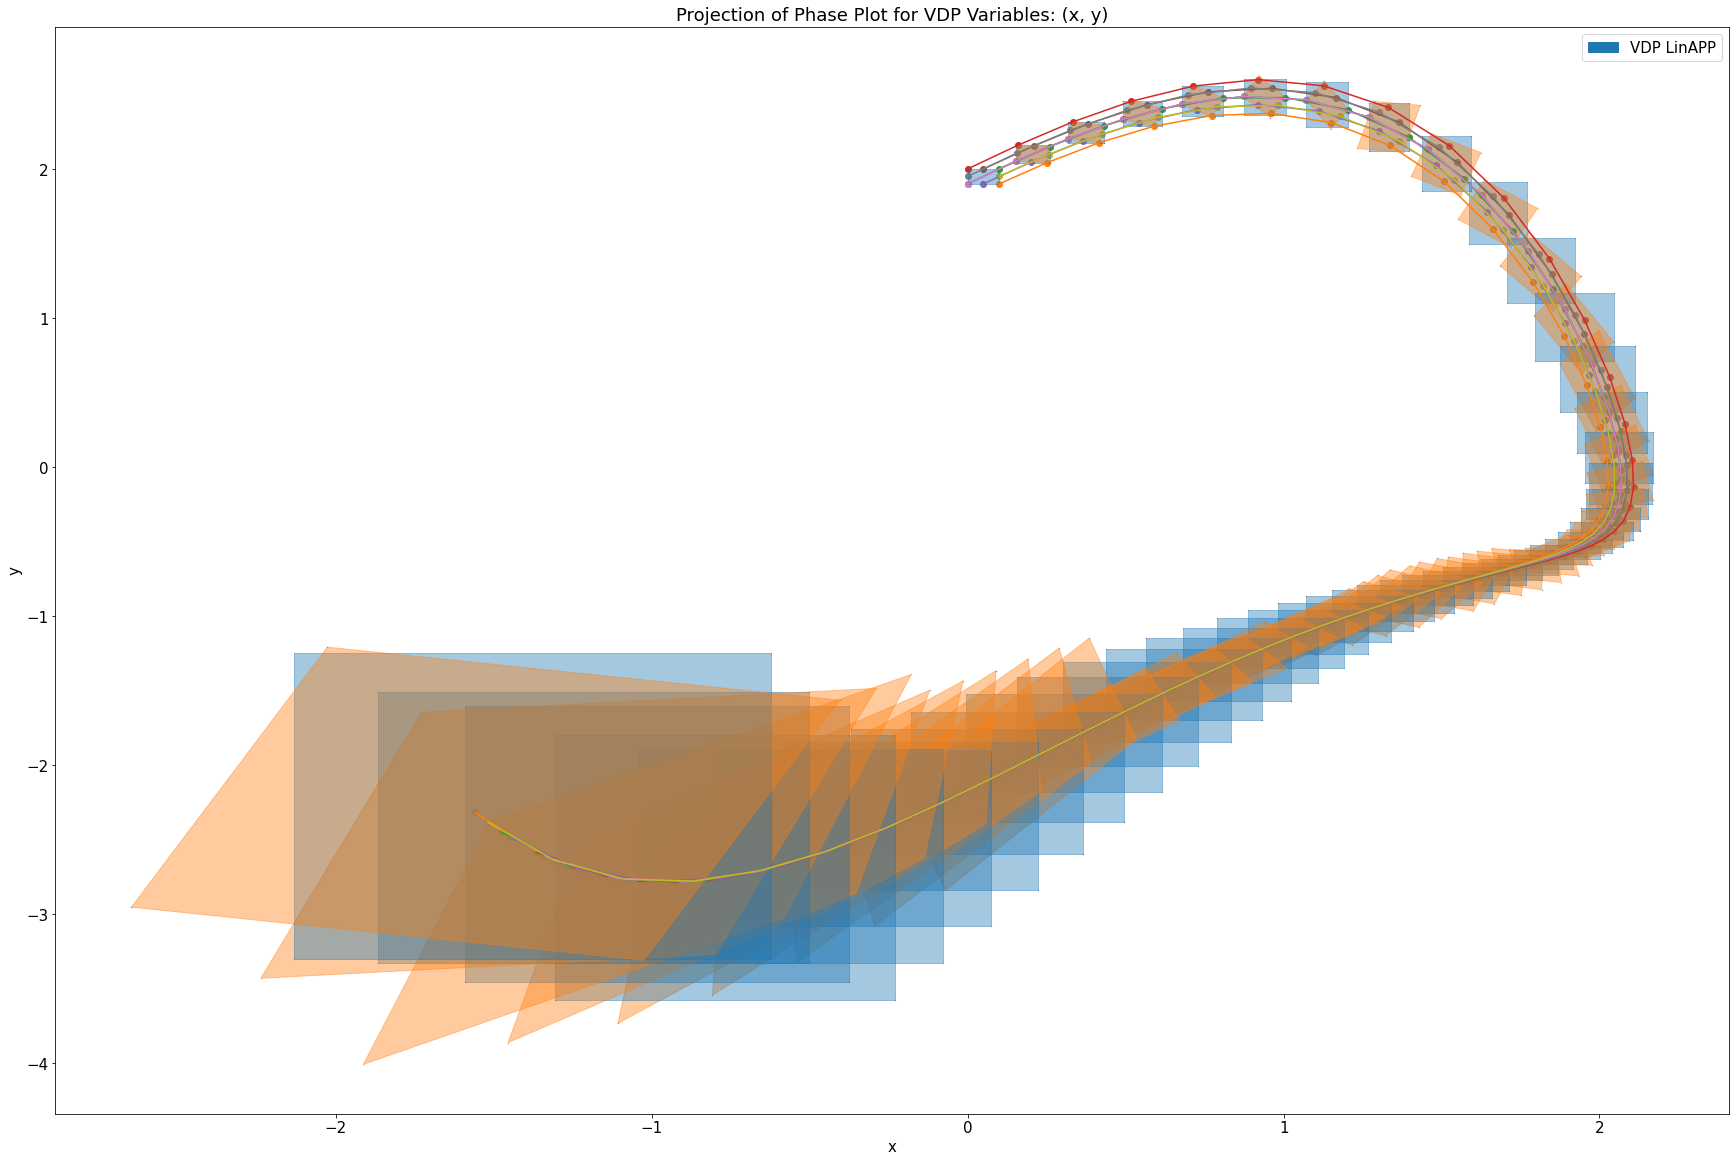

Plotting phase for dimensions x, y done -- Time Spent: 0.7467880249023438
Average Generator Procedure Duration: 0.0004640219595608295 sec
Average Functional Composition Duration: 0.006570818040194927 sec
Average Bound Computation Duration: 0.018768146334078487 sec
Average Reachable Set Computation Duration: 0.35979872703552246 sec
Average Phase Duration: 0.7337504625320435 sec


In [3]:
NUM_STEPS = 50
VDP_LIN_ITER_STEPS = 1 #Number of steps between each recomputation of LinApp Templates.

unit_model = VanDerPol_UnitBox(delta=0.08)
unit_mod_reach = ReachSet(unit_model)

lin_strat = LinStrat(unit_model, iter_steps=VDP_LIN_ITER_STEPS)
mod_lin_flow = unit_mod_reach.computeReachSet(NUM_STEPS, tempstrat=lin_strat)

points = [[0,1.90], [0.1, 1.90], [0.1,2], [0,2], [0.05,1.9], [0.05,2], [0,1.9],  [0,1.95], [0.1,1.95]]
trajs = [Traj(unit_model, point, NUM_STEPS) for point in points]

vdp_plot = Plot()
vdp_plot.add(mod_lin_flow, "VDP LinAPP")

'Add trajectories'
for traj in trajs:
    vdp_plot.add(traj)

vdp_plot.plot2DPhase(0,1, separate=True, plotvertices=True)

Timer.generate_stats()

## PCA Strategy

* Initial Box: $[[0,0.1],[1.9,2]]$
* The PCA directions are calculated every time step.
* The wrapping error becomes particularly bad after step 30 or so when the points become closer together.

Plotting phase for dimensions x, y done -- Time Spent: 0.6042361259460449
Average Generator Procedure Duration: 0.0005528881770222127 sec
Average Functional Composition Duration: 0.007205536886423575 sec
Average Bound Computation Duration: 0.02158916096727387 sec
Average Reachable Set Computation Duration: 1.4862591981887818 sec
Average Phase Duration: 0.6042361259460449 sec


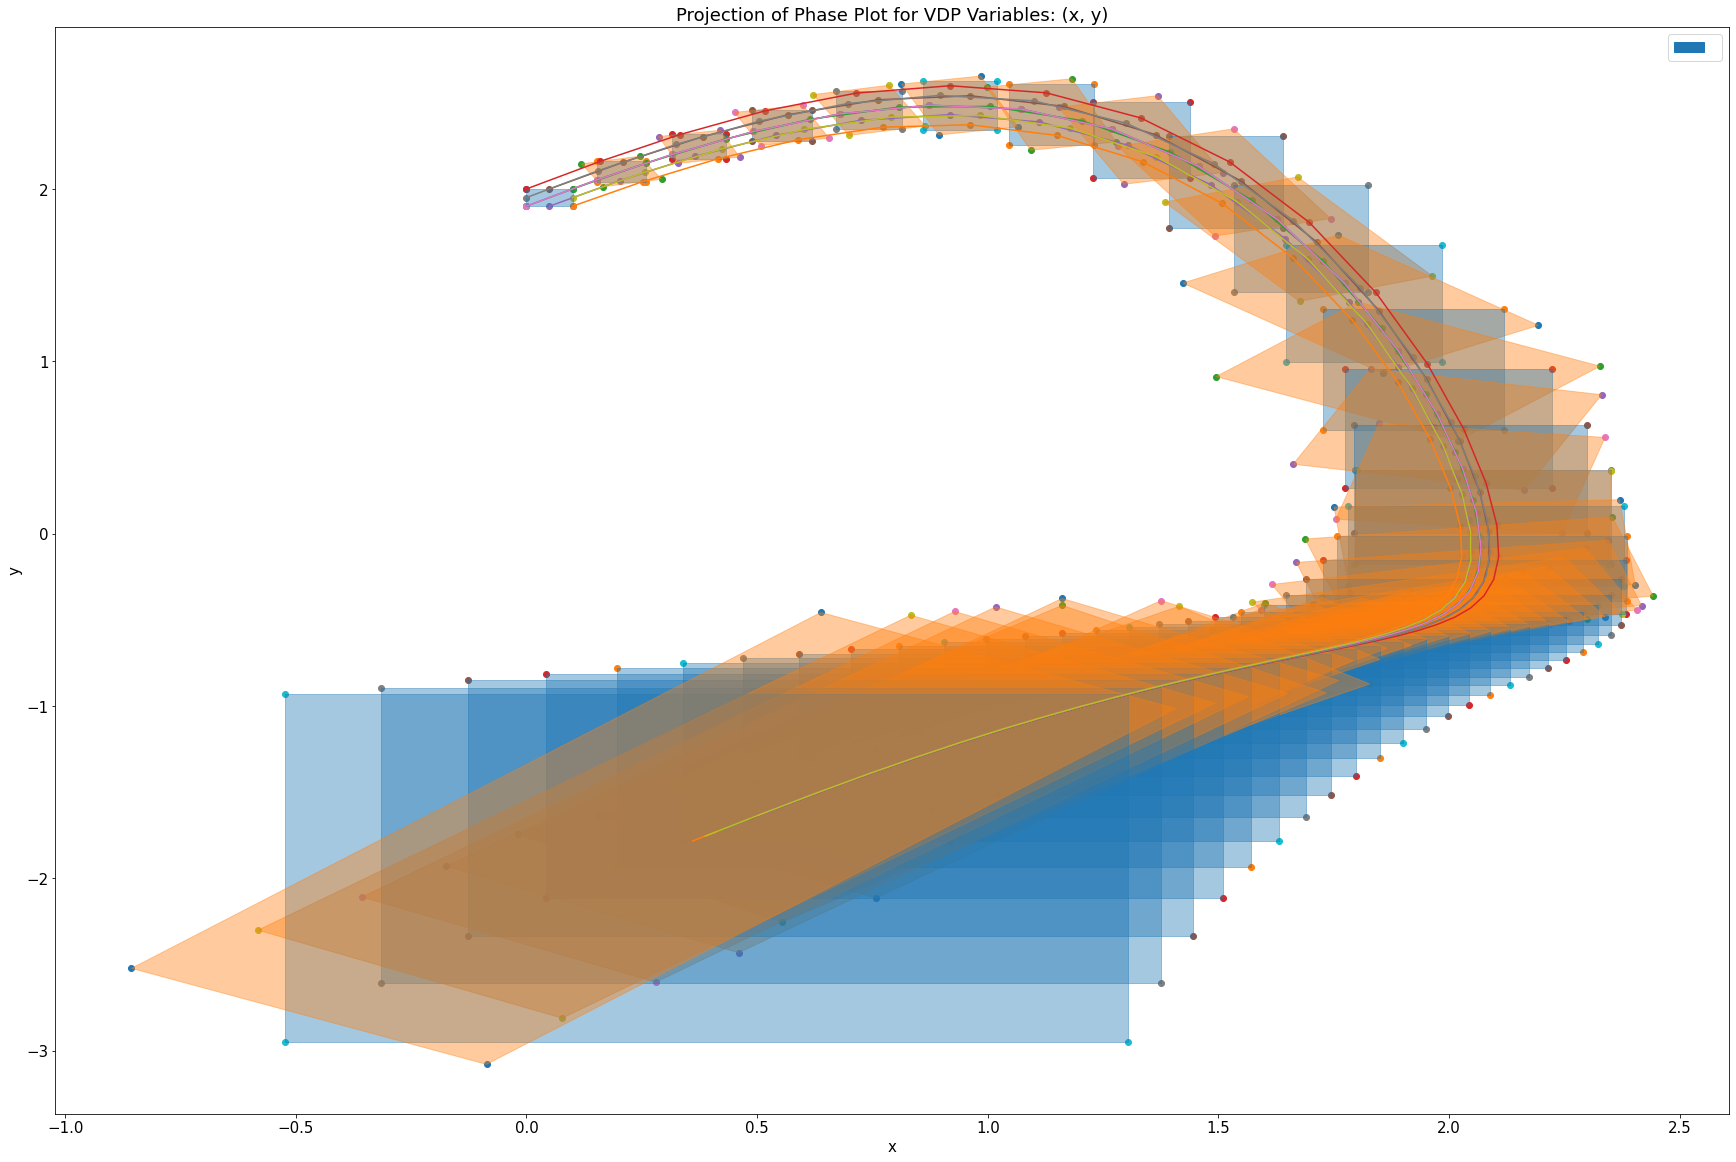

In [2]:
NUM_STEPS = 40
VDP_PCA_ITER_STEPS = 1 #Number of steps between each recomputation of PCA Templates.
'PCA Strategy Parameters'
VDP_PCA_TRAJ_STEPS = 5 #Number of steps our sample trajectories should run.
VDP_PCA_NUM_TRAJ = 200 #Number of sample trajectories we should use for the PCA routine.
unit_model = VanDerPol_UnitBox(delta=0.08)
unit_mod_reach = ReachSet(unit_model)

pca_strat = PCAStrat(unit_model, traj_steps=VDP_PCA_TRAJ_STEPS, num_trajs=VDP_PCA_NUM_TRAJ, iter_steps=VDP_PCA_ITER_STEPS)
mod_lin_flow = unit_mod_reach.computeReachSet(NUM_STEPS, tempstrat=pca_strat)

points = [[0,1.90], [0.1, 1.90], [0.1,2], [0,2], [0.05,1.9], [0.05,2], [0,1.9],  [0,1.95], [0.1,1.95]]
trajs = [Traj(unit_model, point, NUM_STEPS) for point in points]

vdp_plot = Plot()
vdp_plot.add(mod_lin_flow, "VDP PCA")

'Add trajectories'
for traj in trajs:
    vdp_plot.add(traj)

vdp_plot.plot2DPhase(0,1, separate=True, plotvertices=True)

Timer.generate_stats()

## PCA & LinApp Tandem Strategy

* Initial Box: $[[0,0.1],[1.9,2]]$
* Ran for **40** Steps
* From the plots, it seems that running **both** PCA and the Linear App. strategy significantly increases the accuracy of the reachable set especially for the skinny bottleneck after step 30.

* It seems that both strategies seem to synergize when maximizing over both of the templates computed in the previous step.

COND NUM: 1.080162155095919
COND NUM: 1.1797549976516548
COND NUM: 1.3274799688422665
COND NUM: 1.5417659965647081
COND NUM: 1.847262458265547
COND NUM: 2.2800568540799646
COND NUM: 3.0040822309993405
COND NUM: 3.468800842649073
COND NUM: 3.2463676632353615
COND NUM: 3.103150186098991
COND NUM: 2.8796893747137546
COND NUM: 2.7018336787247037
COND NUM: 2.347319413804274
COND NUM: 2.0507905901816907
COND NUM: 2.1777709716623765
COND NUM: 2.5933310896244257
COND NUM: 3.5011642663192513
COND NUM: 6.04599047854121
COND NUM: 8.932190061559622
COND NUM: 10.42214590200996
COND NUM: 12.017158890190123
COND NUM: 15.1709624185808
NORM_DIR_MAT: [[-0.3075496  -0.95153205]
 [-0.17998417 -0.98366951]]
LIN DIR: [[-1.78453366 -7.09287811]
 [-0.27687436 -0.96090613]]
COND NUM: 228.65310346264147
NORM_DIR_MAT: [[-0.27076953 -0.9626442 ]
 [-0.30206511 -0.9532873 ]]
LIN DIR: [[-1.20796025 -4.23085675]
 [ 0.25695375  0.9664237 ]]
COND NUM: 277.53111603173426
NORM_DIR_MAT: [[-0.30358211 -0.95280528]
 [ 0.287

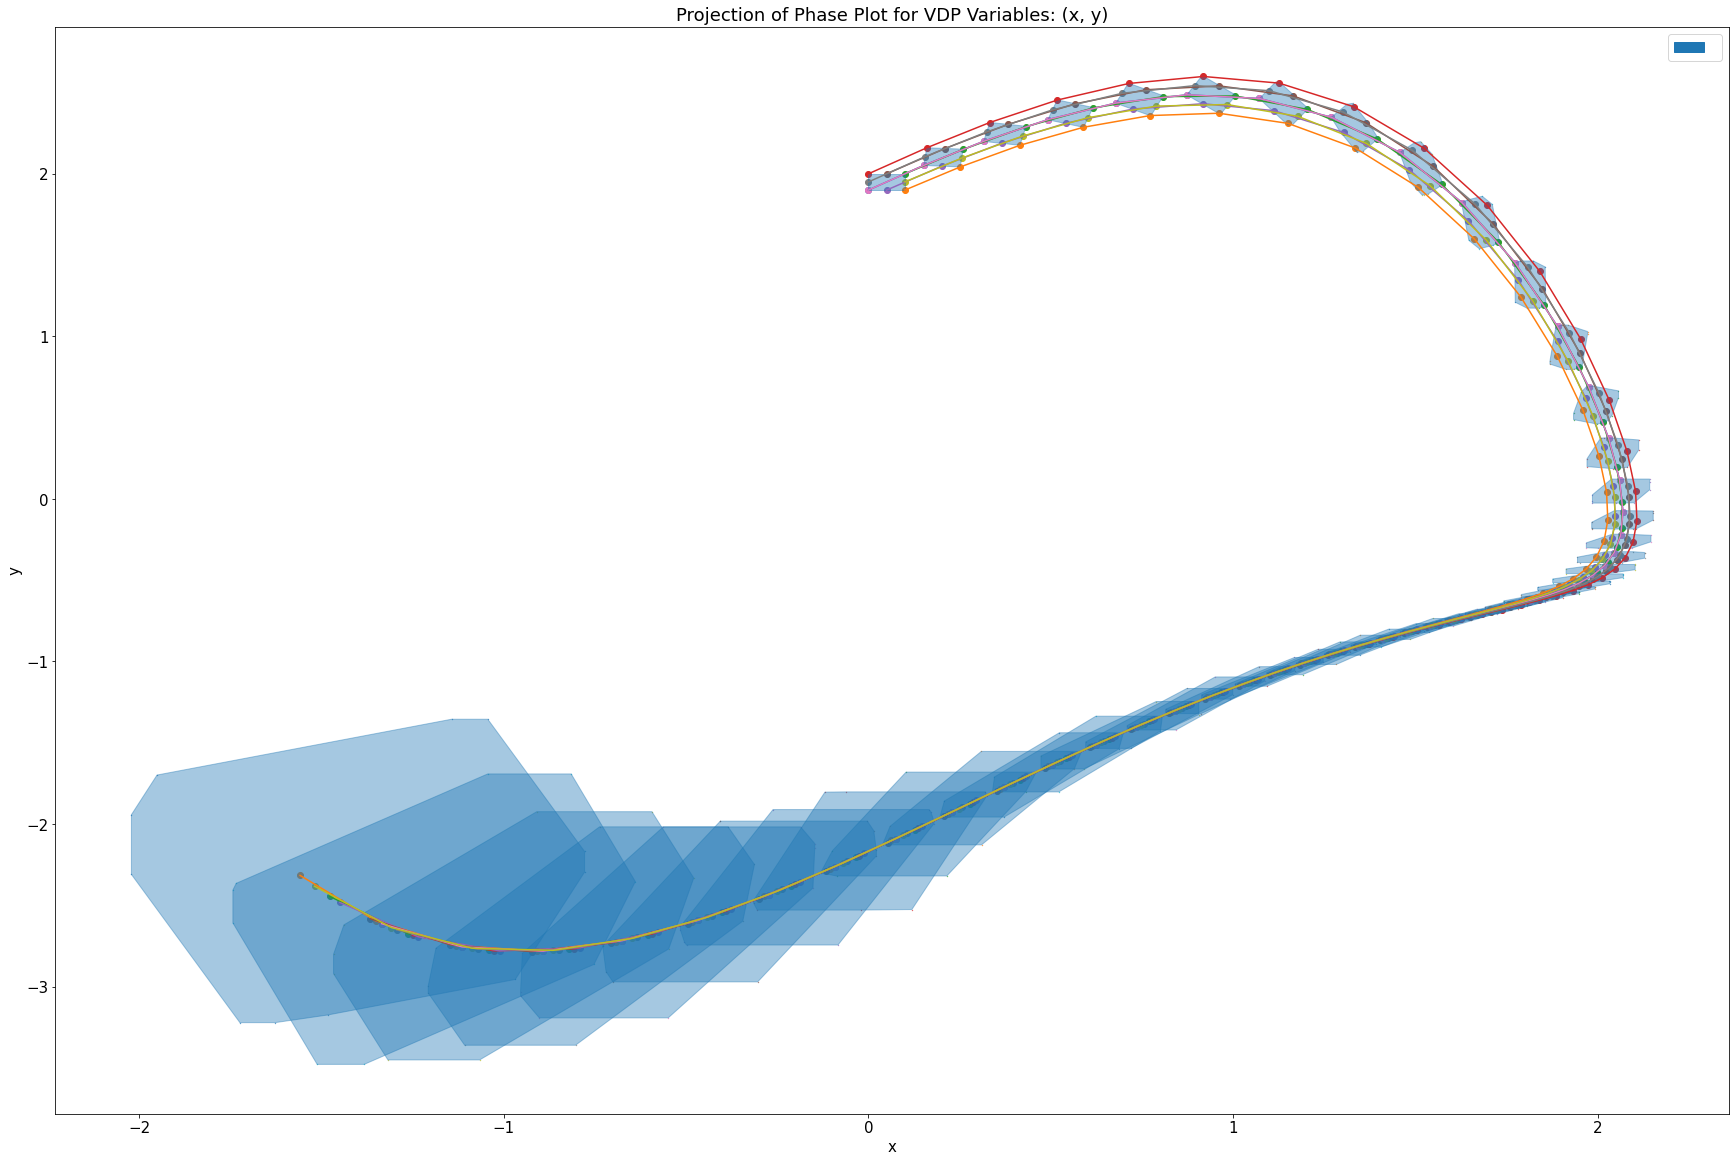

Plotting phase for dimensions x, y done -- Time Spent: 0.49669909477233887


In [3]:
NUM_STEPS = 50
VDP_PCA_ITER_STEPS = 1 #Number of steps between each recomputation of PCA Templates.
'PCA Strategy Parameters'
VDP_PCA_TRAJ_STEPS = 5 #Number of steps our sample trajectories should run.
VDP_PCA_NUM_TRAJ = 200 #Number of sample trajectories we should use for the PCA routine.

unit_model = VanDerPol_UnitBox(delta=0.08)
unit_mod_reach = ReachSet(unit_model)

lin_strat = PCALinStrat(unit_model, traj_steps=VDP_PCA_TRAJ_STEPS, num_trajs=VDP_PCA_NUM_TRAJ, iter_steps=VDP_PCA_ITER_STEPS)
mod_lin_flow = unit_mod_reach.computeReachSet(NUM_STEPS, tempstrat=lin_strat)

points = [[0,1.90], [0.1, 1.90], [0.1,2], [0,2], [0.05,1.9], [0.05,2], [0,1.9],  [0,1.95], [0.1,1.95]]
trajs = [Traj(unit_model, point, NUM_STEPS) for point in points]

vdp_plot = Plot()
vdp_plot.add(mod_lin_flow)

'Add trajectories'
for traj in trajs:
    vdp_plot.add(traj)

vdp_plot.plot2DPhase(0,1, separate=False, plotvertices=True)


# SIR Model ($\Delta = 0.5$)

## Linear Approximation

* Initial Box: $[[0.79,0.8], [0.19, 0.2], 0]$
* The Lin. App. Strategy here seems to degenerate into templates which do not seem to look like paralllelotopes on projections on the $(S,I)$ variables.
* The results also wildly differ on each experiment iteration. The template regions can explode in just 7-8 steps. I suspect that is may occur as a result of the points we randomly sample on the template regions. 
* Thus, **where we sample on the template region** seems to seriously affect the resulting directions we get for SIR.


Plotting phase for dimensions s, i done -- Time Spent: 0.22181081771850586
Average Generator Procedure Duration: 0.0006721327295976944 sec
Average Functional Composition Duration: 0.0053989932911606125 sec
Average Bound Computation Duration: 0.031156450167469596 sec
Average Reachable Set Computation Duration: 0.972509497501811 sec
Average Phase Duration: 0.22949926669781023 sec


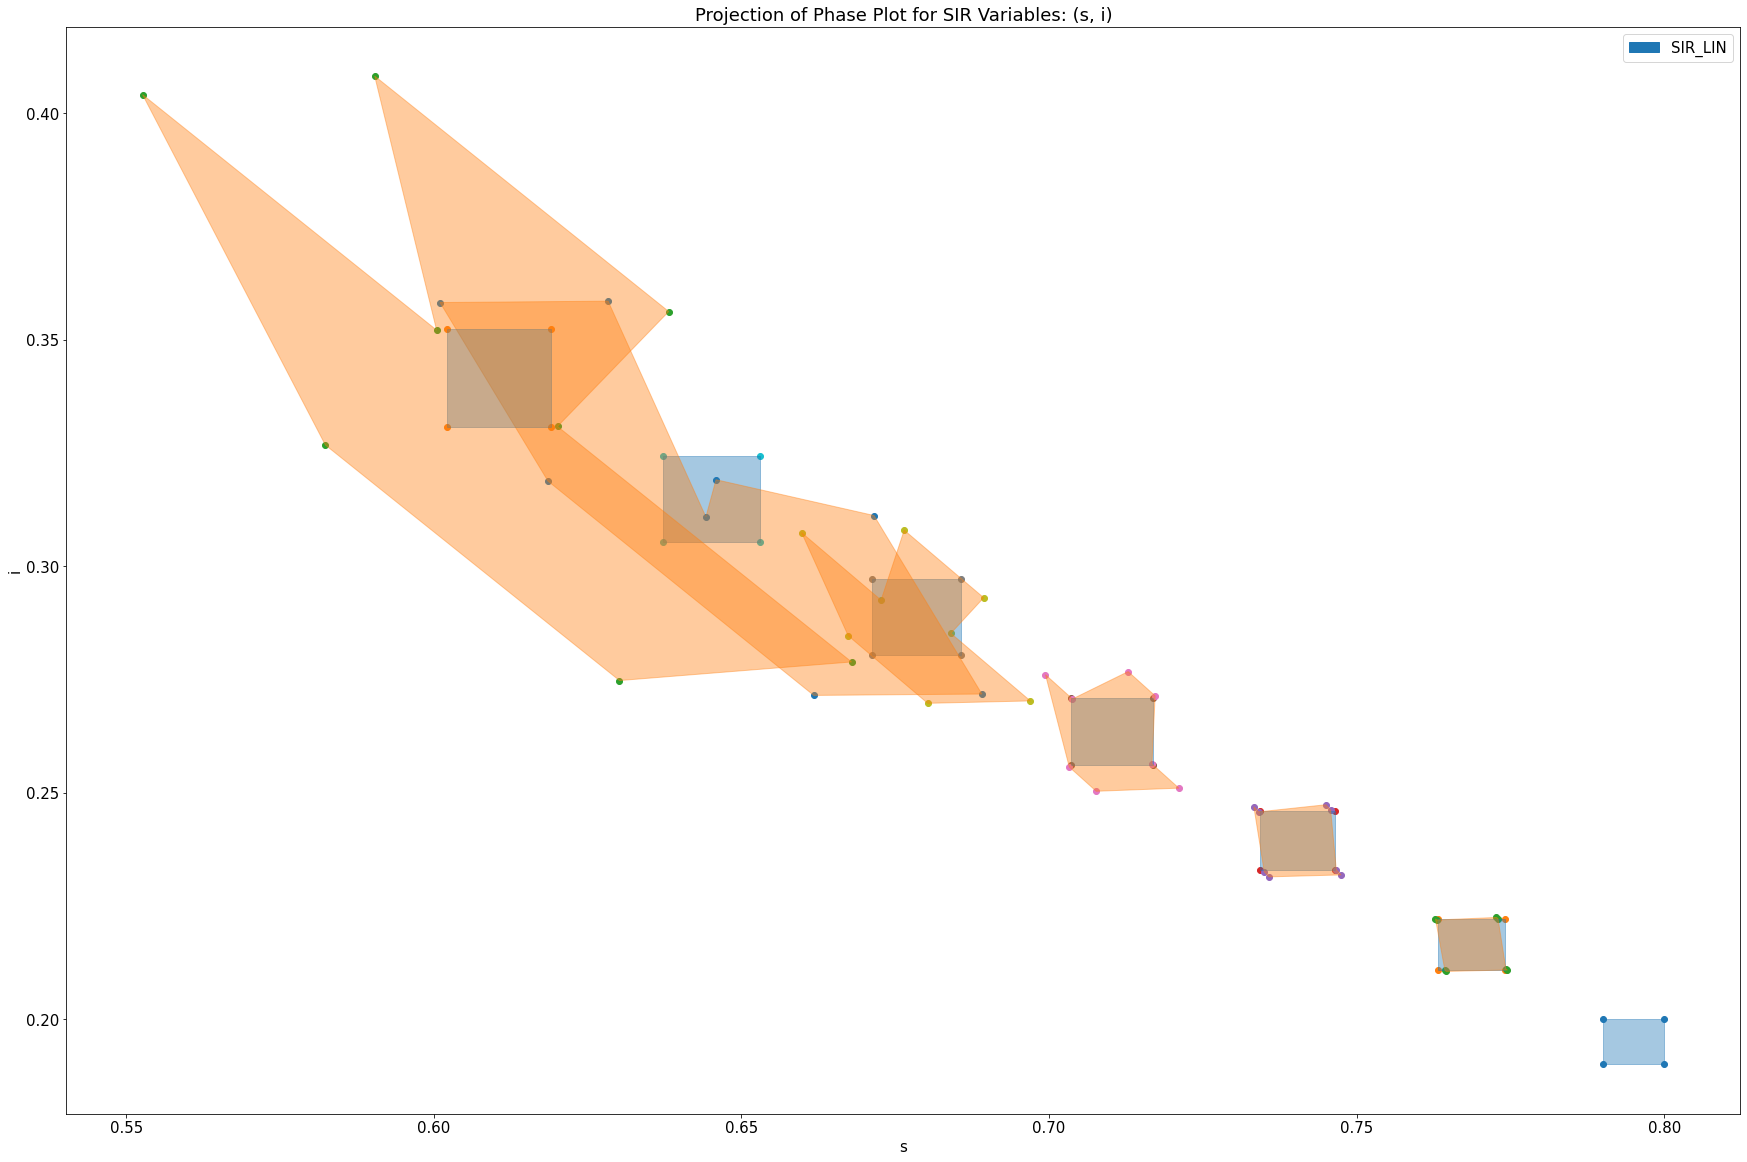

In [10]:
NUM_STEPS = 6
SIR_LIN_ITER_STEPS = 1 

sir_lin = SIR_UnitBox(delta=0.5)
sir_plot = Plot()

sir_lin_reach = ReachSet(sir_lin)
sir_flow_lin = sir_lin_reach.computeReachSet(NUM_STEPS, LinStrat(sir_lin, iter_steps=SIR_LIN_ITER_STEPS))
sir_plot.add(sir_flow_lin, "SIR_LIN")

sir_plot.plot2DPhase(0,1,separate=True, plotvertices=True)
Timer.generate_stats()

## PCA Strategy

* Ran for **30** steps with the PCA routine running with 200 randomly generated trajectories. The trajectories are propagated for 1 step forward. 

Plotting phase for dimensions s, i done -- Time Spent: 0.348146915435791
Average Generator Procedure Duration: 0.0005895370944495175 sec
Average Functional Composition Duration: 0.0052129662398136024 sec
Average Bound Computation Duration: 0.031150318456418587 sec
Average Reachable Set Computation Duration: 56.96512087186178 sec
Average Phase Duration: 0.348146915435791 sec


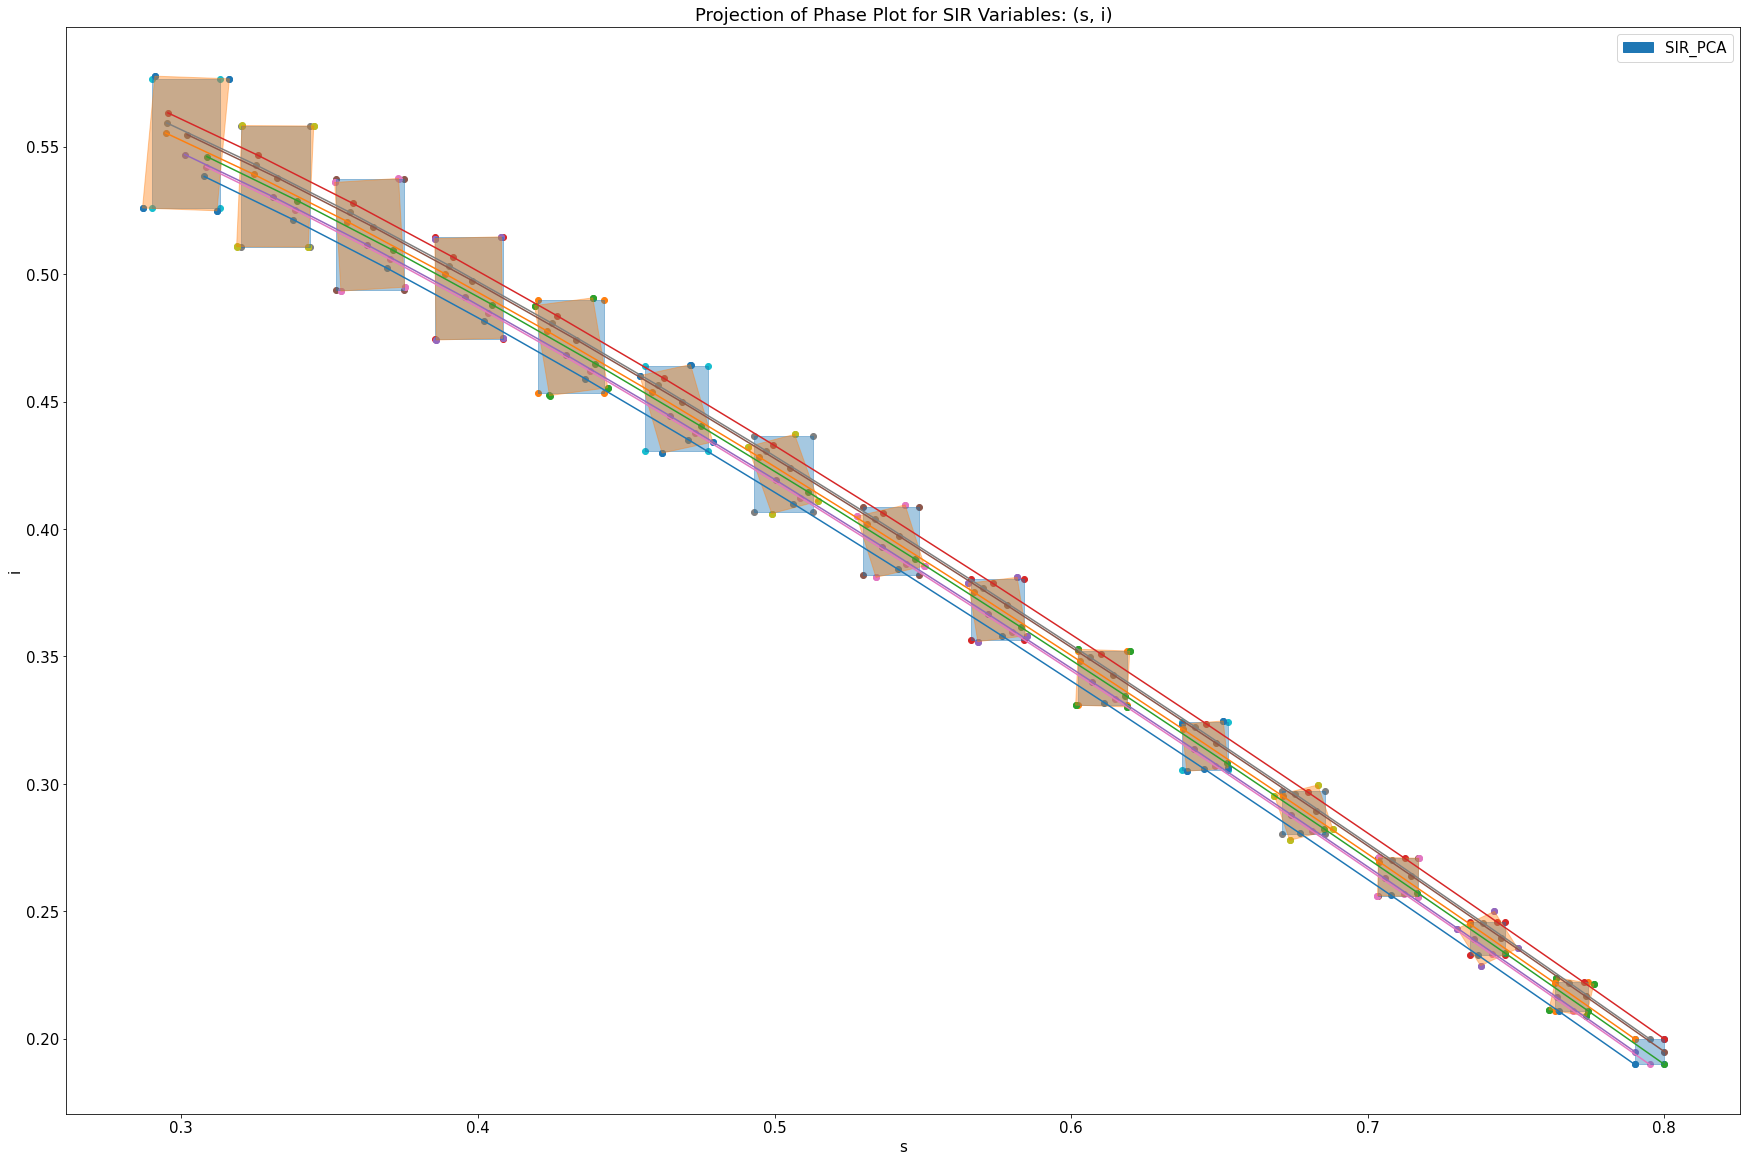

In [2]:
NUM_STEPS = 15
SIR_PCA_ITER_STEPS = 1 #Number of steps between each recomputation of PCA Templates.
'PCA Strategy Parameters'
SIR_PCA_TRAJ_STEPS = 1 #Number of steps our sample trajectories should run.
SIR_PCA_NUM_TRAJ = 100 #Number of sample trajectories we should use for the PCA routine.

sir_pca = SIR_UnitBox(delta=0.5)
sir_plot = Plot()

points = [[0.79,0.19,0], [0.79, 0.2,0], [0.8,0.19,0], [0.8,0.2,0], [0.79,0.195,0], [0.8,0.195,0], [0.795,0.19,0],  [0.795,0.2,0]]
trajs = [Traj(sir_pca, point, NUM_STEPS) for point in points]

pca_strat = PCAStrat(sir_pca, traj_steps=SIR_PCA_TRAJ_STEPS, num_trajs=SIR_PCA_NUM_TRAJ, iter_steps=SIR_PCA_ITER_STEPS)

sir_pca_reach = ReachSet(sir_pca)
sir_flow_pca = sir_pca_reach.computeReachSet(NUM_STEPS, tempstrat=pca_strat)
sir_plot.add(sir_flow_pca, "SIR_PCA")

'Add trajectories'
for traj in trajs:
    sir_plot.add(traj)

sir_plot.plot2DPhase(0,1,separate=True, plotvertices=True)    
Timer.generate_stats()


## PCA & LinApp Tandem Strategy


* This computation was run for 15 steps.
* Similar to the VDP model, running both PCA and LinApp and maximixing over both templates for each step seems to significantly increase the quality of our reachable set.
* Furthermore, the degenerate behavior seen with using the Lin. App. strategy alone seems to have disappeared with using this combined scheme.


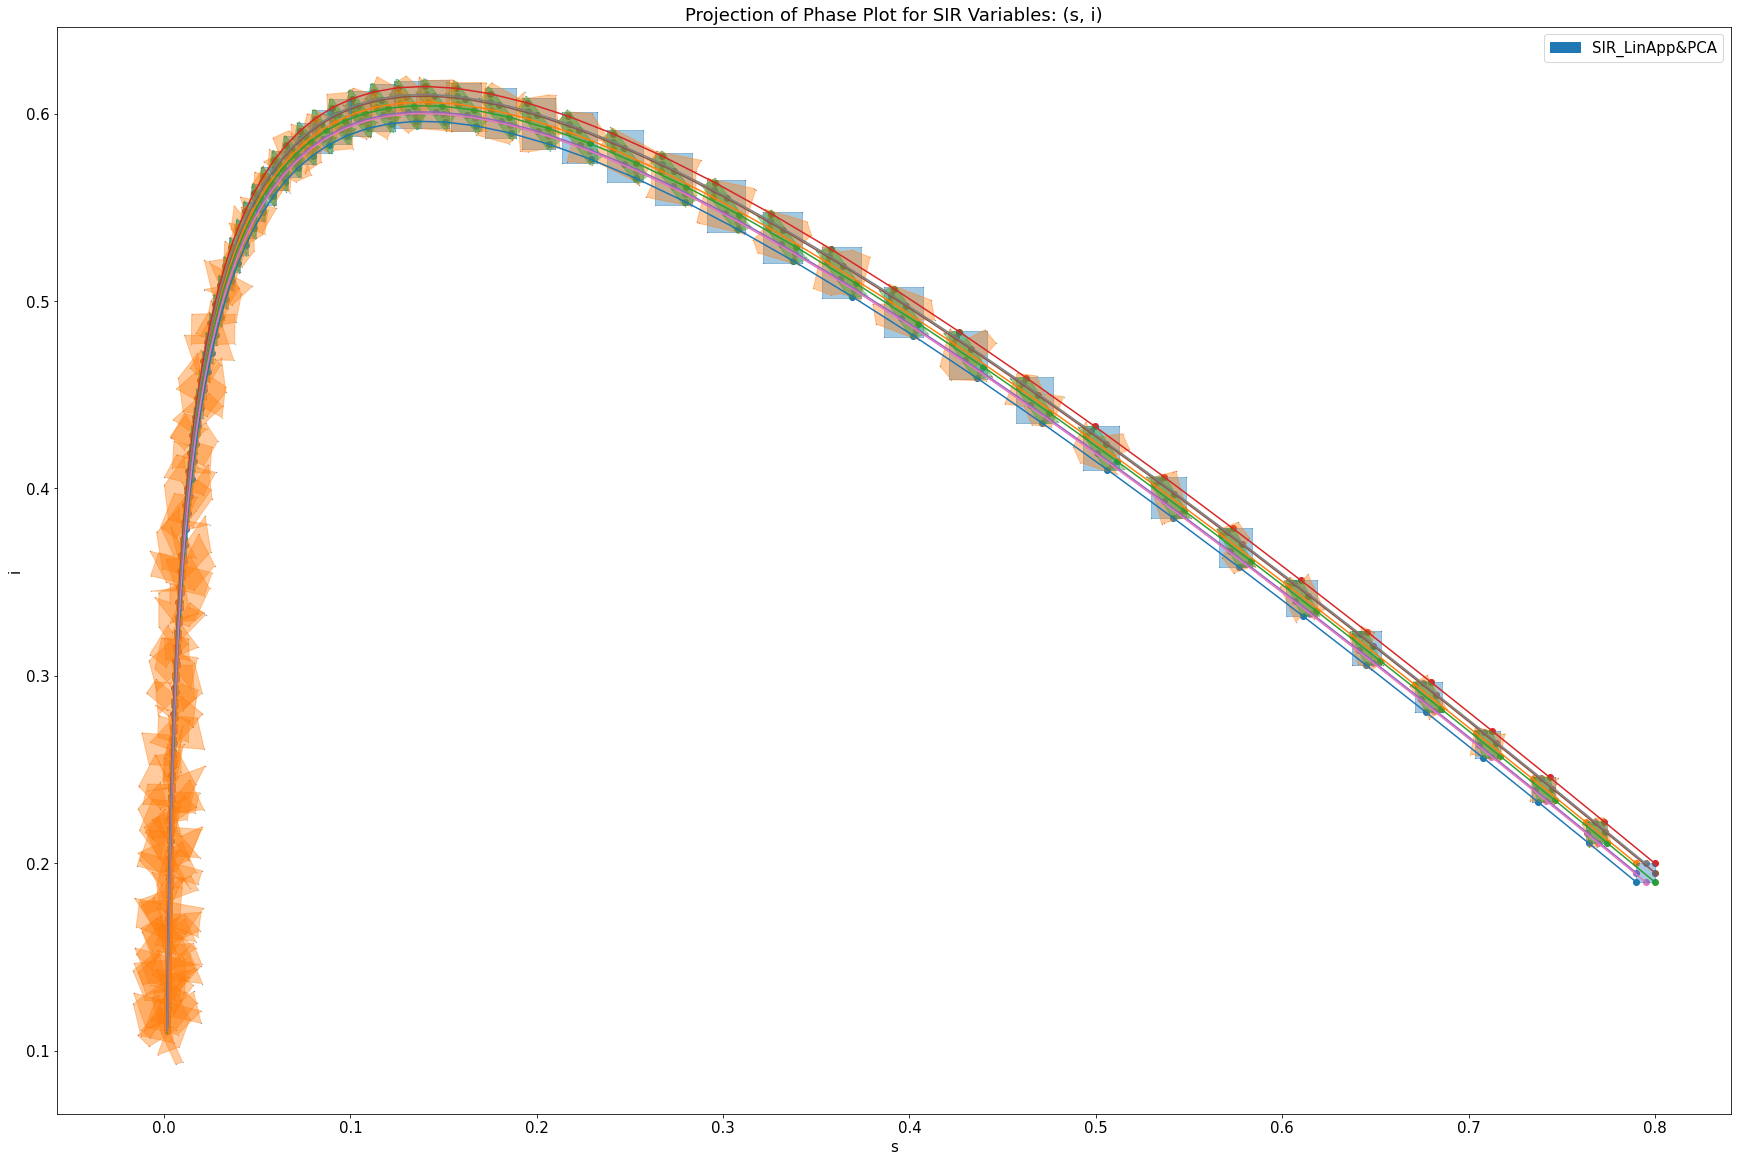

Plotting phase for dimensions s, i done -- Time Spent: 2.044003963470459


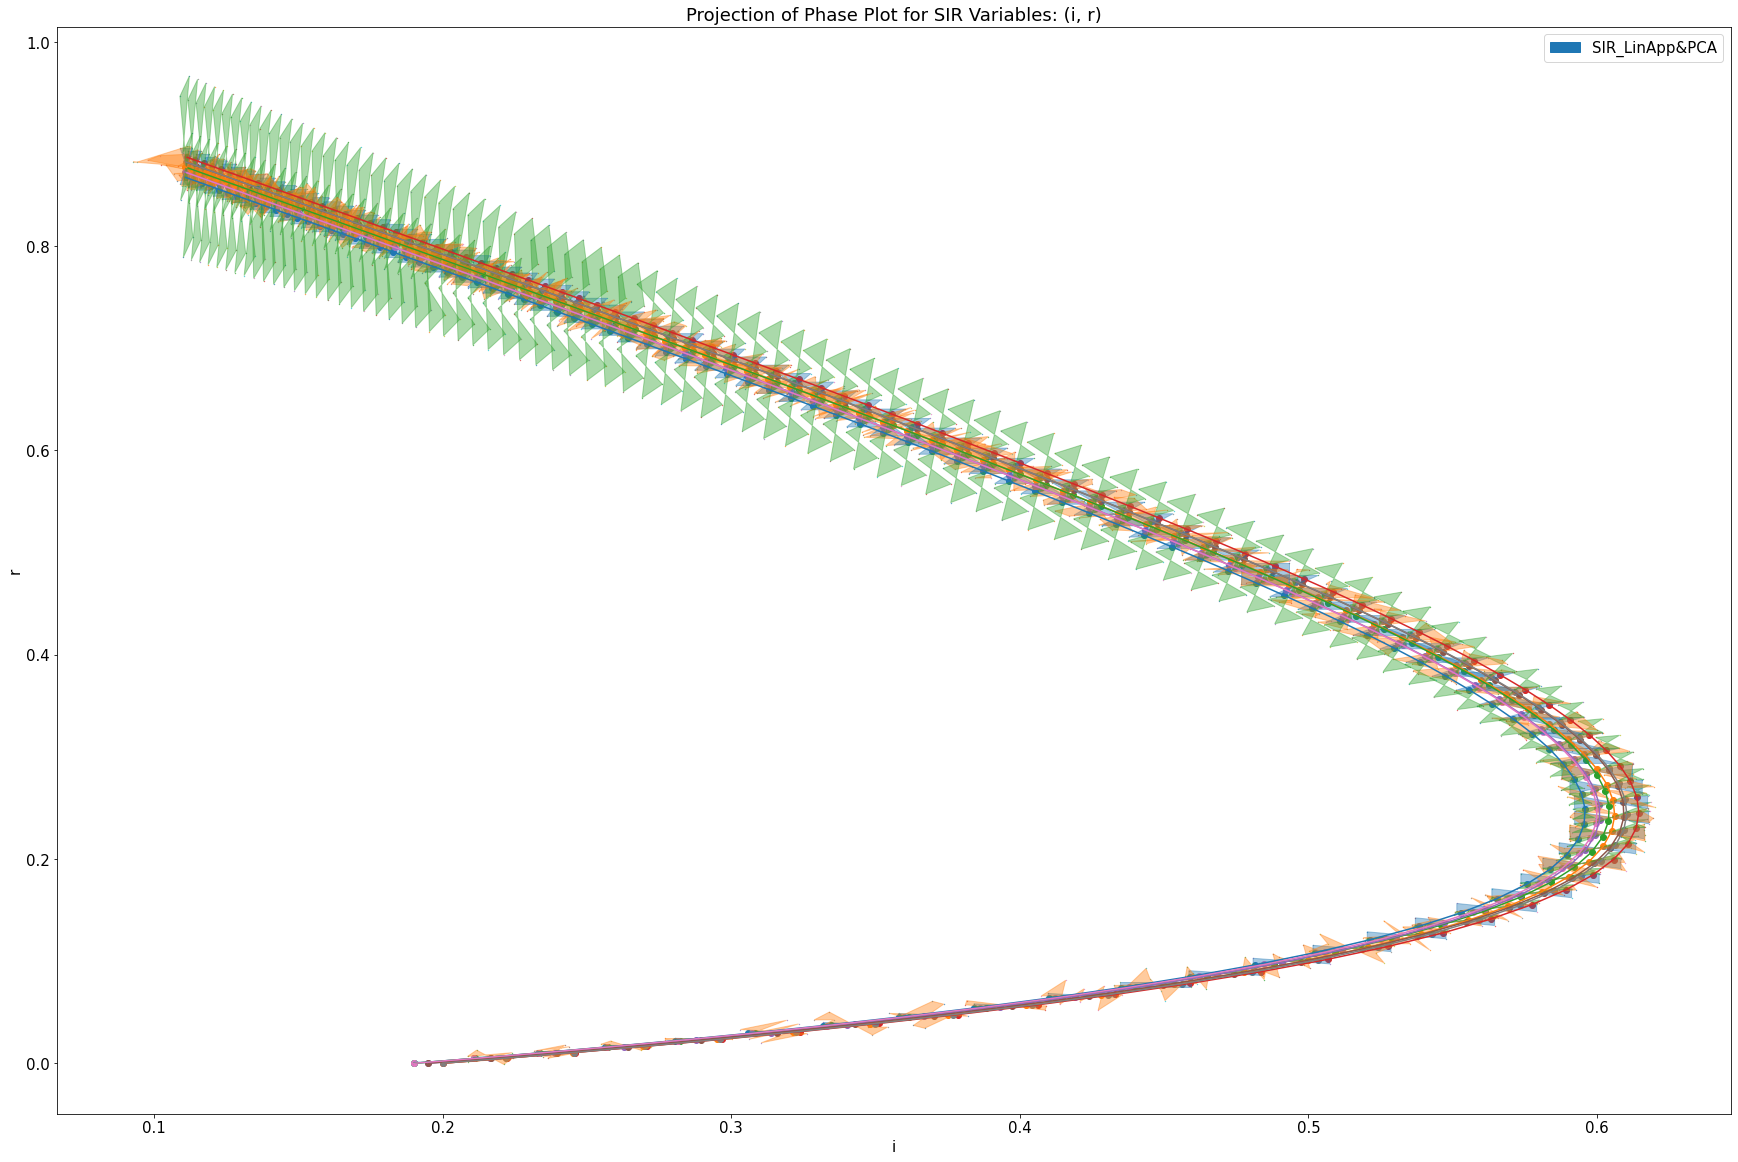

Plotting phase for dimensions i, r done -- Time Spent: 1.9614129066467285


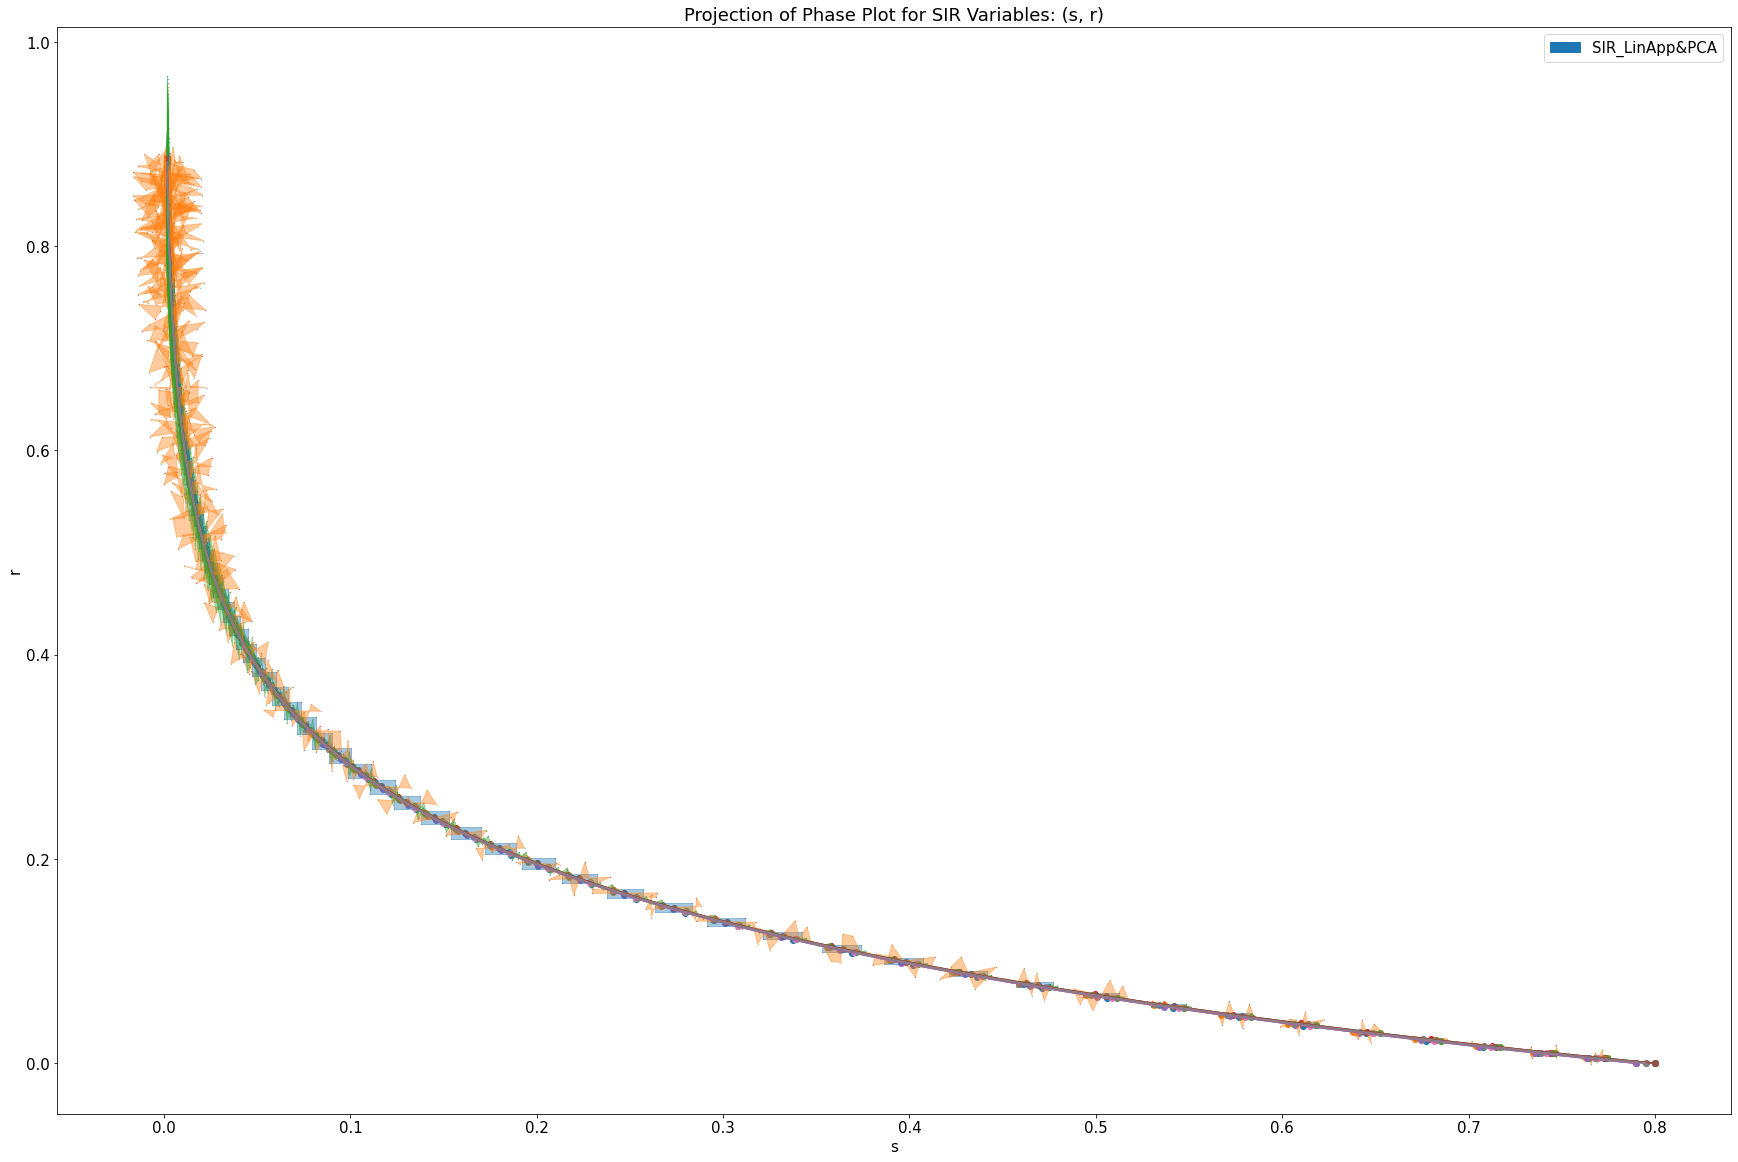

Plotting phase for dimensions s, r done -- Time Spent: 2.2632431983947754
Average Generator Procedure Duration: 0.0007229642439239014 sec
Average Functional Composition Duration: 0.005913883847072946 sec
Average Bound Computation Duration: 0.04489958164310194 sec
Average Reachable Set Computation Duration: 2.829509469001524 sec
Average Phase Duration: 1.8355164527893066 sec


In [5]:
NUM_STEPS = 100
SIR_PCA_ITER_STEPS = 1 #Number of steps between each recomputation of PCA Templates.
'PCA Strategy Parameters'
SIR_PCA_TRAJ_STEPS = 1 #Number of steps our sample trajectories should run.
SIR_PCA_NUM_TRAJ = 100 #Number of sample trajectories we should use for the PCA routine.

sir_pca = SIR_UnitBox(delta=0.5)
sir_plot = Plot()

points = [[0.79,0.19,0], [0.79, 0.2,0], [0.8,0.19,0], [0.8,0.2,0], [0.79,0.195,0], [0.8,0.195,0], [0.795,0.19,0],  [0.795,0.2,0]]
trajs = [Traj(sir_pca, point, NUM_STEPS) for point in points]

pca_strat = PCALinStrat(sir_pca, traj_steps=SIR_PCA_TRAJ_STEPS, num_trajs=SIR_PCA_NUM_TRAJ, iter_steps=SIR_PCA_ITER_STEPS)

sir_pca_reach = ReachSet(sir_pca)
sir_flow_pca = sir_pca_reach.computeReachSet(NUM_STEPS, tempstrat=pca_strat)
sir_plot.add(sir_flow_pca, "SIR_LinApp&PCA")

'Add trajectories'
for traj in trajs:
    sir_plot.add(traj)

sir_plot.plot2DPhase(0,1,separate=True, plotvertices=True)
sir_plot.plot2DPhase(1,2,separate=True, plotvertices=True)    
sir_plot.plot2DPhase(0,2,separate=True, plotvertices=True)    

Timer.generate_stats()

# Rossler Model ($\Delta = 0.025$)

## PCA Strategy

Plotting phase for dimensions x, y done -- Time Spent: 0.4787147045135498


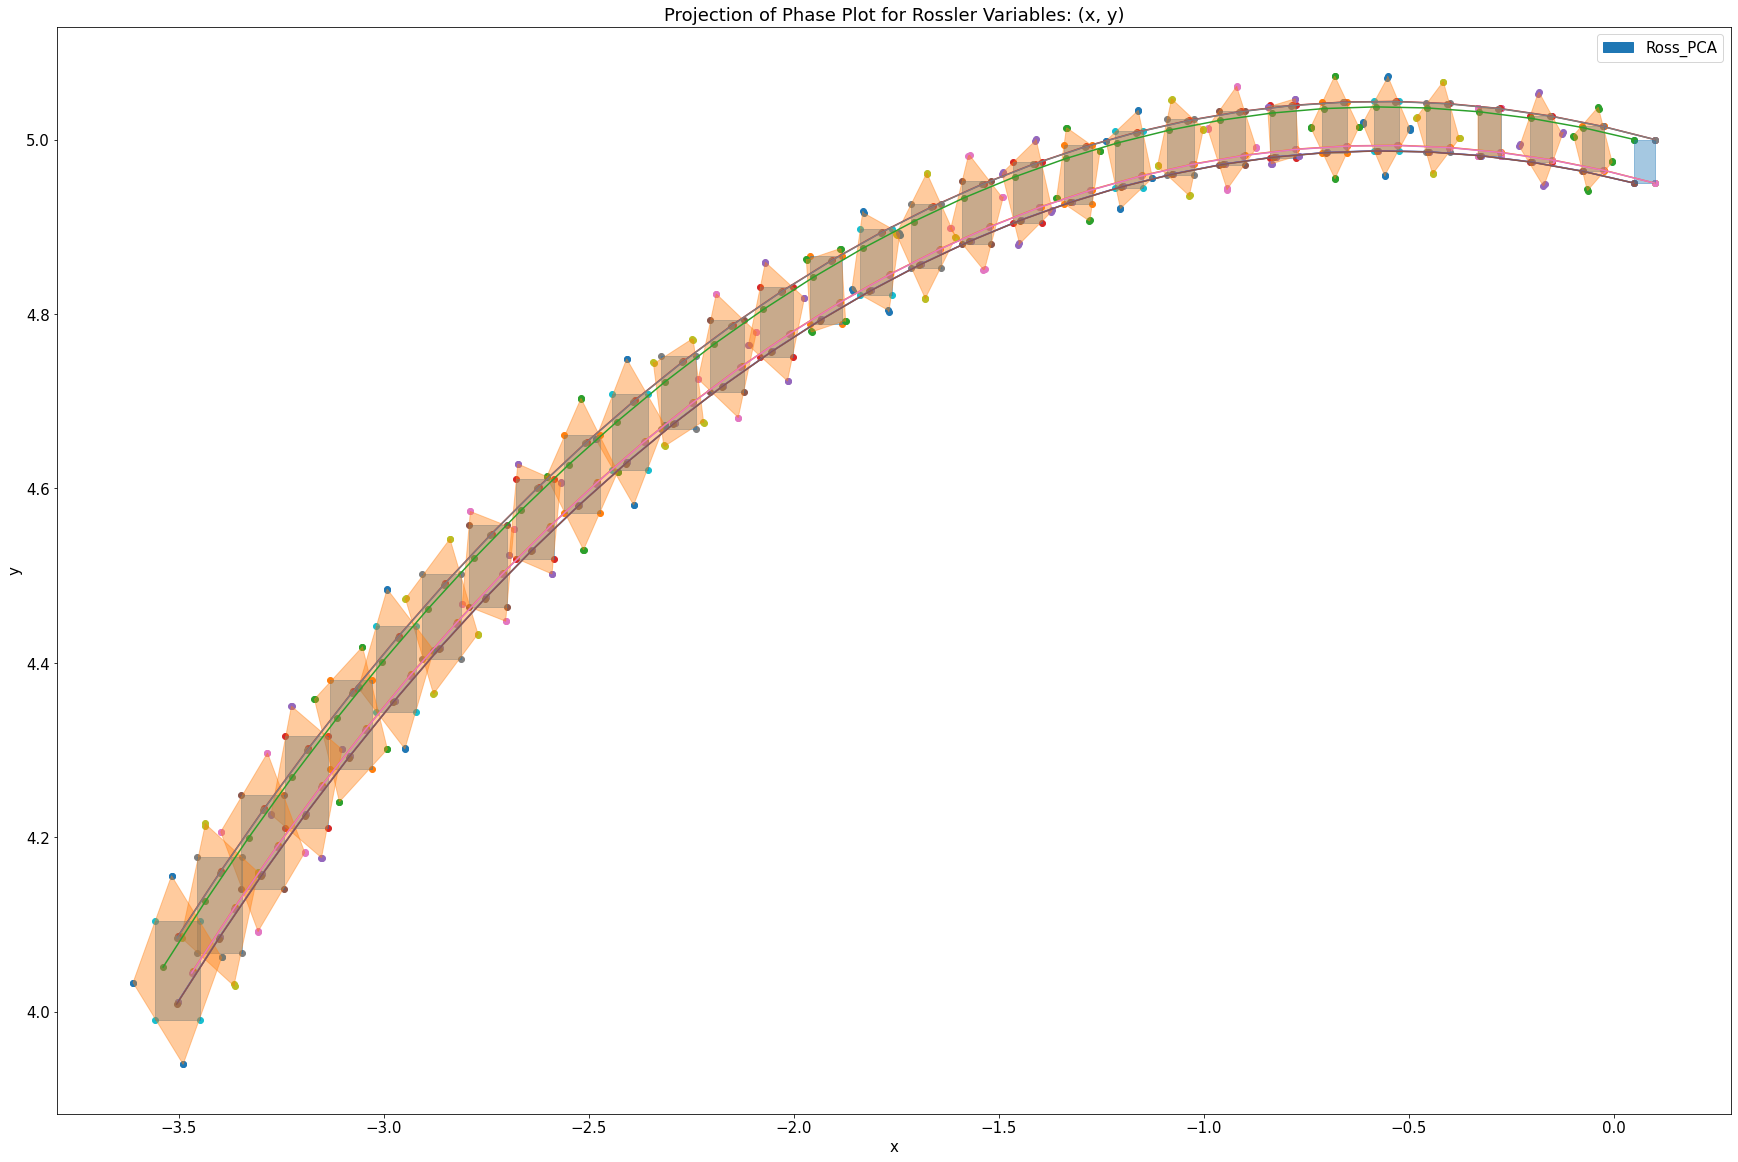

In [2]:
NUM_STEPS = 30
ROSS_PCA_ITER_STEPS = 1 #Number of steps between each recomputation of PCA Templates.
'PCA Strategy Parameters'
ROSS_PCA_TRAJ_STEPS = 1 #Number of steps our sample trajectories should run.
ROSS_PCA_NUM_TRAJ = 200 #Number of sample trajectories we should use for the PCA routine.

rossler_pca = Rossler_UnitBox()
rossler_plot = Plot()

points = [[0.05,4.95,0.05], [0.1,4.95,0.05], [0.05,5,0.05], [0.1,5,0.05], [0.05,4.95,0.05], [0.05,4.95,0.1], [0.1,4.95,0.1], [0.1,5,0.1]]
trajs = [Traj(rossler_pca, point, NUM_STEPS) for point in points]

pca_strat = PCAStrat(rossler_pca, traj_steps=ROSS_PCA_TRAJ_STEPS, num_trajs=ROSS_PCA_NUM_TRAJ, iter_steps=ROSS_PCA_ITER_STEPS)
ross_pca_reach = ReachSet(rossler_pca)
ross_flow_pca = ross_pca_reach.computeReachSet(NUM_STEPS, tempstrat=pca_strat)

'Add trajectories'
for traj in trajs:
    rossler_plot.add(traj)

rossler_plot.add(ross_flow_pca, "Ross_PCA")
rossler_plot.plot2DPhase(0,1, separate=True, plotvertices=True)


## Linear Approximation Strategy

In [ ]:
NUM_STEPS = 15
ROSS_LIN_ITER_STEPS = 1 

rossler_lin = Rossler_UnitBox(delta=0.5)
rossler_plot = Plot()

ross_lin_reach = ReachSet(rossler_lin)
ross_flow_lin = ross_lin_reach.computeReachSet(NUM_STEPS, LinStrat(rossler_lin, iter_steps=ROSS_LIN_ITER_STEPS))
ross_plot.add(ross_flow_lin, "ROSS_LIN")

rossler_plot.plot2DPhase(0,1,separate=True, plotvertices=True)
Timer.generate_stats()

## PCA & Lin App. Tandem Strategy

In [ ]:
NUM_STEPS = 15
ROSS_PCA_ITER_STEPS = 1 #Number of steps between each recomputation of PCA Templates.
'PCA Strategy Parameters'
ROSS_PCA_TRAJ_STEPS = 1 #Number of steps our sample trajectories should run.
ROSS_PCA_NUM_TRAJ = 200 #Number of sample trajectories we should use for the PCA routine.

rossler_pca = Rossler_UnitBox(delta=0.5)
rossler_plot = Plot()

points = [[0.05,4.95,0.05], [0.1,4.95,0.05], [0.05,5,0.05], [0.1,5,0.05], [0.05,4.95,0.05], [0.05,4.95,0.1], [0.1,4.95,0.1], [0.1,5,0.1]]
trajs = [Traj(rossler_pca, point, NUM_STEPS) for point in points]

pca_strat = PCALinStrat(rossler_pca, traj_steps=ROSS_PCA_TRAJ_STEPS, num_trajs=ROSS_PCA_NUM_TRAJ, iter_steps=ROSS_PCA_ITER_STEPS)

ross_pca_reach = ReachSet(rossler_pca)
ross_flow_pca = ross_pca_reach.computeReachSet(NUM_STEPS, tempstrat=pca_strat)
rossler_plot.add(sir_flow_pca, "SIR_LinApp&PCA")

'Add trajectories'
for traj in trajs:
    rossler_plot.add(traj)

rossler_plot.plot2DPhase(0,1,separate=True, plotvertices=True)    
Timer.generate_stats()

Computed Step 0 -- Time Elapsed: 1.9007010459899902 sec
Computed Step 1 -- Time Elapsed: 2.8931212425231934 sec
Computed Step 2 -- Time Elapsed: 2.797151803970337 sec
Computed Step 3 -- Time Elapsed: 2.8621280193328857 sec
Computed Step 4 -- Time Elapsed: 2.8596081733703613 sec
Computed Step 5 -- Time Elapsed: 2.8287699222564697 sec
Computed Step 6 -- Time Elapsed: 2.836167097091675 sec
Computed Step 7 -- Time Elapsed: 2.809713840484619 sec


# Quadcopter Model

## PCA/LinStrat Strategy

In [ ]:
NUM_STEPS = 5
QUAD_PCA_ITER_STEPS = 1 #Number of steps between each recomputation of PCA Templates.
'PCA Strategy Parameters'
QUAD_PCA_TRAJ_STEPS = 1 #Number of steps our sample trajectories should run.
QUAD_PCA_NUM_TRAJ = 200 #Number of sample trajectories we should use for the PCA routine.

quad_pca = Quadcopter_UnitBox()
quad_plot = Plot()

#trajs = [Traj(rossler_pca, point, NUM_STEPS) for point in points]

pca_strat = PCAStrat(quad_pca, traj_steps=QUAD_PCA_TRAJ_STEPS, num_trajs=QUAD_PCA_NUM_TRAJ, iter_steps=QUAD_PCA_ITER_STEPS)
quad_pca_reach = ReachSet(quad_pca)
quad_flow_pca = quad_pca_reach.computeReachSet(NUM_STEPS, tempstrat=pca_strat)

'Add trajectories'
#for traj in trajs:
#    rossler_plot.add(traj)

quad_plot.add(quad_flow_pca, "Quad_PCA")
quad_plot.plot2DPhase(2,5, separate=True, plotvertices=True)
